In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import datetime
import csv
import os
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from modules.prediction import load_all_data
from modules.prediction import precrime_train_test_split
from modules.prediction import load_splits
from modules.prediction import create_all_splits
from modules.prediction import sample_model


In [3]:
crime_data = load_all_data()
splits = load_splits()
train_test_data = create_all_splits(crime_data, splits)

/Users/jsamet/anaconda2/envs/py3k/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
X_train_fine, X_test_fine, y_train_fine, y_test_fine = train_test_data['fine']
X_train_coarse, X_test_coarse, y_train_coarse, y_test_coarse = train_test_data['coarse']
X_train_2016, X_test_2016, y_train_2016, y_test_2016 = train_test_data['2016']

In [5]:
X_train_fine.to_csv('../precrime_data/X_train_fine.csv')

In [6]:
y_train_fine.to_csv('../precrime_data/y_train_fine.csv')

In [7]:
X_test_fine.to_csv('../precrime_data/X_test_fine.csv')

In [9]:
y_test_fine.to_csv('../precrime_data/y_test_fine.csv')

In [5]:
X_train_fine

,COMPLAINT_YEAR,COMPLAINT_MONTH,COMPLAINT_DAY,COMPLAINT_HOURGROUP,ADDR_PCT_CD,COMPLAINT_DAYOFWEEK,apparentTemperature,cloudCover,dewPoint,humidity,...,time,uvIndex,visibility,windBearing,windGust,windSpeed,PrecinctShapefileID,Population,Median_Household_Income,Percent_Bachelors_Degree
0,2006,1,2,0,1,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,1.0,50759.992787,49552.406674,37.904058
1,2006,1,2,0,5,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,5.0,52702.442572,93694.177015,71.278494
2,2006,1,2,0,6,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,6.0,94685.084360,104825.381471,77.011882
3,2006,1,2,0,7,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,7.0,24355.832493,102522.108750,75.036762
4,2006,1,2,0,9,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,9.0,55655.264949,98068.363209,72.707739
5,2006,1,2,0,10,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,10.0,208446.223078,120394.538189,80.862932
6,2006,1,2,0,13,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,13.0,74454.924260,37490.551888,35.569583
7,2006,1,2,0,14,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,14.0,107939.103871,84177.322498,66.827260
8,2006,1,2,0,17,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,17.0,52222.680139,47700.495530,41.421655
9,2006,1,2,0,18,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,18.0,63531.889933,39764.042564,30.885092


In [6]:
y_train_fine

,Homicide,Rape,Robbery,FelonyAssault,Burglary,GrandLarceny,GrandLarcenyAuto,Fraud,Forgery,Arson,Drugs,Weapons,CriminalMischief,Other,COMPLAINT_IDS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,218039893 236109607
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,886457370
5,0,0,0,2,0,0,0,0,0,0,0,0,0,0,697451116 974691933
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,484715525
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
9,0,0,0,0,0,2,0,0,0,0,0,0,0,0,318229393 689081600


In [7]:
X_test_fine

,COMPLAINT_YEAR,COMPLAINT_MONTH,COMPLAINT_DAY,COMPLAINT_HOURGROUP,ADDR_PCT_CD,COMPLAINT_DAYOFWEEK,apparentTemperature,cloudCover,dewPoint,humidity,...,time,uvIndex,visibility,windBearing,windGust,windSpeed,PrecinctShapefileID,Population,Median_Household_Income,Percent_Bachelors_Degree
231,2006,1,2,12,1,0,42.95,0.63,31.98,0.61,...,1136228400,1.0,9.74,153.0,NaN,3.40,1.0,50759.992787,49552.406674,37.904058
232,2006,1,2,12,5,0,42.95,0.63,31.98,0.61,...,1136228400,1.0,9.74,153.0,NaN,3.40,5.0,52702.442572,93694.177015,71.278494
233,2006,1,2,12,6,0,42.95,0.63,31.98,0.61,...,1136228400,1.0,9.74,153.0,NaN,3.40,6.0,94685.084360,104825.381471,77.011882
234,2006,1,2,12,7,0,42.95,0.63,31.98,0.61,...,1136228400,1.0,9.74,153.0,NaN,3.40,7.0,24355.832493,102522.108750,75.036762
235,2006,1,2,12,9,0,42.95,0.63,31.98,0.61,...,1136228400,1.0,9.74,153.0,NaN,3.40,9.0,55655.264949,98068.363209,72.707739
236,2006,1,2,12,10,0,42.95,0.63,31.98,0.61,...,1136228400,1.0,9.74,153.0,NaN,3.40,10.0,208446.223078,120394.538189,80.862932
237,2006,1,2,12,13,0,42.95,0.63,31.98,0.61,...,1136228400,1.0,9.74,153.0,NaN,3.40,13.0,74454.924260,37490.551888,35.569583
238,2006,1,2,12,14,0,42.95,0.63,31.98,0.61,...,1136228400,1.0,9.74,153.0,NaN,3.40,14.0,107939.103871,84177.322498,66.827260
239,2006,1,2,12,17,0,42.95,0.63,31.98,0.61,...,1136228400,1.0,9.74,153.0,NaN,3.40,17.0,52222.680139,47700.495530,41.421655
240,2006,1,2,12,18,0,42.95,0.63,31.98,0.61,...,1136228400,1.0,9.74,153.0,NaN,3.40,18.0,63531.889933,39764.042564,30.885092


In [8]:
y_test_fine

,Homicide,Rape,Robbery,FelonyAssault,Burglary,GrandLarceny,GrandLarcenyAuto,Fraud,Forgery,Arson,Drugs,Weapons,CriminalMischief,Other,COMPLAINT_IDS
231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
232,0,0,0,0,0,1,0,0,0,0,0,0,0,0,595312365
233,0,0,0,0,0,1,0,0,0,0,0,0,0,0,914130437
234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
235,0,0,0,0,0,1,0,0,0,0,0,0,0,0,635585528
236,0,0,0,0,0,1,1,0,0,0,0,0,0,0,772726112 312098453
237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
238,0,0,1,0,0,2,0,1,1,0,0,0,0,0,365087357 106844704 187829063 608864915 387637031
239,0,0,0,0,0,1,0,0,0,0,0,0,0,0,252353977
240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,


In [9]:
X_train_coarse

,COMPLAINT_YEAR,COMPLAINT_MONTH,COMPLAINT_DAY,COMPLAINT_HOURGROUP,ADDR_PCT_CD,COMPLAINT_DAYOFWEEK,apparentTemperature,cloudCover,dewPoint,humidity,...,time,uvIndex,visibility,windBearing,windGust,windSpeed,PrecinctShapefileID,Population,Median_Household_Income,Percent_Bachelors_Degree
0,2006,1,2,0,1,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,1.0,50759.992787,49552.406674,37.904058
1,2006,1,2,0,5,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,5.0,52702.442572,93694.177015,71.278494
2,2006,1,2,0,6,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,6.0,94685.084360,104825.381471,77.011882
3,2006,1,2,0,7,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,7.0,24355.832493,102522.108750,75.036762
4,2006,1,2,0,9,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,9.0,55655.264949,98068.363209,72.707739
5,2006,1,2,0,10,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,10.0,208446.223078,120394.538189,80.862932
6,2006,1,2,0,13,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,13.0,74454.924260,37490.551888,35.569583
7,2006,1,2,0,14,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,14.0,107939.103871,84177.322498,66.827260
8,2006,1,2,0,17,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,17.0,52222.680139,47700.495530,41.421655
9,2006,1,2,0,18,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,18.0,63531.889933,39764.042564,30.885092


In [10]:
y_train_coarse

,Homicide,Rape,Robbery,FelonyAssault,Burglary,GrandLarceny,GrandLarcenyAuto,Fraud,Forgery,Arson,Drugs,Weapons,CriminalMischief,Other,COMPLAINT_IDS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,218039893 236109607
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,886457370
5,0,0,0,2,0,0,0,0,0,0,0,0,0,0,697451116 974691933
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,484715525
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
9,0,0,0,0,0,2,0,0,0,0,0,0,0,0,318229393 689081600


In [11]:
X_test_coarse

,COMPLAINT_YEAR,COMPLAINT_MONTH,COMPLAINT_DAY,COMPLAINT_HOURGROUP,ADDR_PCT_CD,COMPLAINT_DAYOFWEEK,apparentTemperature,cloudCover,dewPoint,humidity,...,time,uvIndex,visibility,windBearing,windGust,windSpeed,PrecinctShapefileID,Population,Median_Household_Income,Percent_Bachelors_Degree
463386,2008,10,1,0,1,2,63.17,0.99,59.68,0.89,...,1222840800,0.0,4.11,162.0,NaN,2.00,1.0,50759.992787,49552.406674,37.904058
463387,2008,10,1,0,5,2,63.17,0.99,59.68,0.89,...,1222840800,0.0,4.11,162.0,NaN,2.00,5.0,52702.442572,93694.177015,71.278494
463388,2008,10,1,0,6,2,63.17,0.99,59.68,0.89,...,1222840800,0.0,4.11,162.0,NaN,2.00,6.0,94685.084360,104825.381471,77.011882
463389,2008,10,1,0,7,2,63.17,0.99,59.68,0.89,...,1222840800,0.0,4.11,162.0,NaN,2.00,7.0,24355.832493,102522.108750,75.036762
463390,2008,10,1,0,9,2,63.17,0.99,59.68,0.89,...,1222840800,0.0,4.11,162.0,NaN,2.00,9.0,55655.264949,98068.363209,72.707739
463391,2008,10,1,0,10,2,63.17,0.99,59.68,0.89,...,1222840800,0.0,4.11,162.0,NaN,2.00,10.0,208446.223078,120394.538189,80.862932
463392,2008,10,1,0,13,2,63.17,0.99,59.68,0.89,...,1222840800,0.0,4.11,162.0,NaN,2.00,13.0,74454.924260,37490.551888,35.569583
463393,2008,10,1,0,14,2,63.17,0.99,59.68,0.89,...,1222840800,0.0,4.11,162.0,NaN,2.00,14.0,107939.103871,84177.322498,66.827260
463394,2008,10,1,0,17,2,63.17,0.99,59.68,0.89,...,1222840800,0.0,4.11,162.0,NaN,2.00,17.0,52222.680139,47700.495530,41.421655
463395,2008,10,1,0,18,2,63.17,0.99,59.68,0.89,...,1222840800,0.0,4.11,162.0,NaN,2.00,18.0,63531.889933,39764.042564,30.885092


In [12]:
y_test_coarse

,Homicide,Rape,Robbery,FelonyAssault,Burglary,GrandLarceny,GrandLarcenyAuto,Fraud,Forgery,Arson,Drugs,Weapons,CriminalMischief,Other,COMPLAINT_IDS
463386,0,0,0,1,0,0,0,0,0,0,0,0,0,0,517069733
463387,0,0,0,0,0,1,0,0,0,0,0,0,0,0,579694133
463388,0,0,1,0,0,0,0,0,0,0,0,0,0,0,460837843
463389,0,0,0,0,0,0,0,0,1,0,0,0,0,0,207715981
463390,0,0,0,0,0,1,0,1,0,0,0,0,0,0,198887375 251470127
463391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
463392,0,0,0,0,0,1,0,0,0,0,0,0,0,0,259459508
463393,0,0,0,0,0,1,0,0,0,0,0,0,0,0,954249248
463394,0,0,1,0,0,0,0,0,0,0,0,0,0,0,826476689
463395,0,0,1,0,0,2,0,0,0,0,0,0,0,0,100355486 552858378 796692426


In [13]:
X_train_2016

,COMPLAINT_YEAR,COMPLAINT_MONTH,COMPLAINT_DAY,COMPLAINT_HOURGROUP,ADDR_PCT_CD,COMPLAINT_DAYOFWEEK,apparentTemperature,cloudCover,dewPoint,humidity,...,time,uvIndex,visibility,windBearing,windGust,windSpeed,PrecinctShapefileID,Population,Median_Household_Income,Percent_Bachelors_Degree
0,2006,1,2,0,1,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,1.0,50759.992787,49552.406674,37.904058
1,2006,1,2,0,5,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,5.0,52702.442572,93694.177015,71.278494
2,2006,1,2,0,6,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,6.0,94685.084360,104825.381471,77.011882
3,2006,1,2,0,7,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,7.0,24355.832493,102522.108750,75.036762
4,2006,1,2,0,9,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,9.0,55655.264949,98068.363209,72.707739
5,2006,1,2,0,10,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,10.0,208446.223078,120394.538189,80.862932
6,2006,1,2,0,13,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,13.0,74454.924260,37490.551888,35.569583
7,2006,1,2,0,14,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,14.0,107939.103871,84177.322498,66.827260
8,2006,1,2,0,17,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,17.0,52222.680139,47700.495530,41.421655
9,2006,1,2,0,18,0,34.61,0.24,31.26,0.78,...,1136185200,0.0,9.35,243.0,NaN,3.96,18.0,63531.889933,39764.042564,30.885092


In [14]:
y_train_2016

,Homicide,Rape,Robbery,FelonyAssault,Burglary,GrandLarceny,GrandLarcenyAuto,Fraud,Forgery,Arson,Drugs,Weapons,CriminalMischief,Other,COMPLAINT_IDS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,218039893 236109607
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,886457370
5,0,0,0,2,0,0,0,0,0,0,0,0,0,0,697451116 974691933
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,484715525
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
9,0,0,0,0,0,2,0,0,0,0,0,0,0,0,318229393 689081600


In [15]:
X_test_2016

,COMPLAINT_YEAR,COMPLAINT_MONTH,COMPLAINT_DAY,COMPLAINT_HOURGROUP,ADDR_PCT_CD,COMPLAINT_DAYOFWEEK,apparentTemperature,cloudCover,dewPoint,humidity,...,time,uvIndex,visibility,windBearing,windGust,windSpeed,PrecinctShapefileID,Population,Median_Household_Income,Percent_Bachelors_Degree
1686762,2016,1,1,0,1,4,35.59,NaN,27.55,0.57,...,1451631600,NaN,10.00,304.0,NaN,10.38,1.0,50759.992787,49552.406674,37.904058
1686763,2016,1,1,0,5,4,35.59,NaN,27.55,0.57,...,1451631600,NaN,10.00,304.0,NaN,10.38,5.0,52702.442572,93694.177015,71.278494
1686764,2016,1,1,0,6,4,35.59,NaN,27.55,0.57,...,1451631600,NaN,10.00,304.0,NaN,10.38,6.0,94685.084360,104825.381471,77.011882
1686765,2016,1,1,0,7,4,35.59,NaN,27.55,0.57,...,1451631600,NaN,10.00,304.0,NaN,10.38,7.0,24355.832493,102522.108750,75.036762
1686766,2016,1,1,0,9,4,35.59,NaN,27.55,0.57,...,1451631600,NaN,10.00,304.0,NaN,10.38,9.0,55655.264949,98068.363209,72.707739
1686767,2016,1,1,0,10,4,35.59,NaN,27.55,0.57,...,1451631600,NaN,10.00,304.0,NaN,10.38,10.0,208446.223078,120394.538189,80.862932
1686768,2016,1,1,0,13,4,35.59,NaN,27.55,0.57,...,1451631600,NaN,10.00,304.0,NaN,10.38,13.0,74454.924260,37490.551888,35.569583
1686769,2016,1,1,0,14,4,35.59,NaN,27.55,0.57,...,1451631600,NaN,10.00,304.0,NaN,10.38,14.0,107939.103871,84177.322498,66.827260
1686770,2016,1,1,0,17,4,35.59,NaN,27.55,0.57,...,1451631600,NaN,10.00,304.0,NaN,10.38,17.0,52222.680139,47700.495530,41.421655
1686771,2016,1,1,0,18,4,35.59,NaN,27.55,0.57,...,1451631600,NaN,10.00,304.0,NaN,10.38,18.0,63531.889933,39764.042564,30.885092


In [16]:
y_test_2016

,Homicide,Rape,Robbery,FelonyAssault,Burglary,GrandLarceny,GrandLarcenyAuto,Fraud,Forgery,Arson,Drugs,Weapons,CriminalMischief,Other,COMPLAINT_IDS
1686762,0,0,0,0,0,1,0,0,0,0,0,0,1,0,829406806 496203963
1686763,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
1686764,0,0,0,2,0,3,0,0,0,0,0,0,0,0,277684027 920296197 244825040 212075349 502079527
1686765,0,0,0,3,0,2,0,0,0,0,0,0,0,0,363755831 943694977 477840378 324448342 970238645
1686766,0,1,0,0,0,2,0,0,0,0,0,0,0,1,792470770 288319671 249651675 653615052
1686767,0,0,0,0,0,2,0,1,0,0,0,0,0,0,387032950 460930996 402560815
1686768,0,0,0,1,0,1,0,0,0,0,0,0,0,0,430816562 909325568
1686769,0,1,0,0,0,11,0,0,0,0,0,0,0,1,734649377 566386598 726004241 859637331 273270...
1686770,0,0,0,0,0,1,0,0,0,0,0,0,0,0,726514722
1686771,0,0,2,1,0,7,0,0,0,0,0,0,1,0,267825963 556147663 628667691 155589124 589524...


In [34]:
y_pred, ridges, cols = sample_model(X_train_fine, y_train_fine, X_test_fine)

In [18]:
y_pred

,COMPLAINT_YEAR,COMPLAINT_MONTH,COMPLAINT_DAY,COMPLAINT_HOURGROUP,ADDR_PCT_CD,Homicide,Rape,Robbery,FelonyAssault,Burglary,GrandLarceny,GrandLarcenyAuto,Fraud,Forgery,Arson,Drugs,Weapons,CriminalMischief,Other
231,2006,1,2,12,1,-0.000351,0.010231,0.068750,0.029223,0.110347,0.671324,0.008605,0.082267,0.055762,0.002238,-0.001523,0.000494,0.018540,0.040101
232,2006,1,2,12,5,-0.000028,0.009171,0.079214,0.056790,0.083380,0.416588,-0.002505,0.060924,0.060464,0.003943,0.001381,0.002107,0.021076,0.067530
233,2006,1,2,12,6,-0.000305,0.011015,0.096731,0.042131,0.114726,0.676810,0.007083,0.078441,0.031007,0.000947,0.021480,0.004642,0.034767,0.034155
234,2006,1,2,12,7,0.000018,0.010462,0.094334,0.046049,0.068905,0.318123,0.006945,0.062629,0.031376,0.005372,0.032313,0.013447,0.012501,0.055129
235,2006,1,2,12,9,0.000110,0.014380,0.107887,0.062414,0.119059,0.539070,0.013260,0.089228,0.032067,0.004727,0.035724,0.015521,0.015175,0.057158
236,2006,1,2,12,10,0.000064,0.010370,0.084838,0.044159,0.077571,0.499379,0.007590,0.081391,0.034050,0.003021,0.020788,0.013124,0.015867,0.041346
237,2006,1,2,12,13,0.000018,0.019220,0.113741,0.063843,0.157182,0.855162,0.014044,0.110848,0.051889,0.003160,0.012537,0.013032,0.024395,0.048583
238,2006,1,2,12,14,0.000156,0.017976,0.123883,0.071218,0.204617,1.255015,-0.001675,0.081299,0.141365,0.001270,0.024752,0.019578,0.049195,0.076749
239,2006,1,2,12,17,-0.000535,0.010047,0.059069,0.019266,0.086606,0.513670,0.001321,0.084618,0.029901,0.000762,-0.002998,-0.005637,0.015175,0.024843
240,2006,1,2,12,18,0.000018,0.015164,0.096362,0.056882,0.129616,1.025632,0.006991,0.104763,0.053318,0.002652,0.016547,0.000079,0.030019,0.045034


In [19]:
for crime_type in y_train_fine.select_dtypes(exclude=['object']).columns:
    print('{0}: R2 = {1:.1f}, MSE = {2:.4f}'.format(
            crime_type,
            100*r2_score(y_test_fine[crime_type], y_pred[crime_type]),
            mean_squared_error(y_test_fine[crime_type], y_pred[crime_type]
    )))

Homicide: R2 = 0.3, MSE = 0.0030
Rape: R2 = 0.5, MSE = 0.0148
Robbery: R2 = 4.6, MSE = 0.1222
FelonyAssault: R2 = 5.1, MSE = 0.1332
Burglary: R2 = 3.6, MSE = 0.1198
GrandLarceny: R2 = 12.6, MSE = 0.2746
GrandLarcenyAuto: R2 = 3.5, MSE = 0.0613
Fraud: R2 = 2.2, MSE = 0.0336
Forgery: R2 = 2.2, MSE = 0.0336
Arson: R2 = 0.4, MSE = 0.0088
Drugs: R2 = 3.5, MSE = 0.0402
Weapons: R2 = 2.8, MSE = 0.0312
CriminalMischief: R2 = 1.7, MSE = 0.0528
Other: R2 = 3.9, MSE = 0.0806


In [20]:
os.makedirs('../model_predictions/fine/', exist_ok=True)
y_pred.to_csv('../model_predictions/fine/ridge_regression.csv', quoting=csv.QUOTE_NONNUMERIC)

In [28]:
crime_data.groupby('ADDR_PCT_CD').mean()[y_pred.columns[5:]]

,Homicide,Rape,Robbery,FelonyAssault,Burglary,GrandLarceny,GrandLarcenyAuto,Fraud,Forgery,Arson,Drugs,Weapons,CriminalMischief,Other
ADDR_PCT_CD,,,,,,,,,,,,,,
1,0.000415,0.007593,0.041407,0.039582,0.081404,0.512364,0.021616,0.031782,0.042528,0.002199,0.004937,0.008464,0.026595,0.033358
5,0.000705,0.006929,0.052693,0.067588,0.054560,0.257862,0.010497,0.010995,0.046220,0.003942,0.008091,0.010207,0.028338,0.059497
6,0.000539,0.008464,0.069745,0.051655,0.084931,0.514065,0.020413,0.028504,0.017094,0.000913,0.028587,0.012530,0.043648,0.026886
7,0.000788,0.007966,0.068044,0.056842,0.039831,0.158493,0.020496,0.012655,0.017218,0.005228,0.039208,0.021119,0.021036,0.047963
9,0.000913,0.011576,0.081321,0.071820,0.090573,0.378599,0.025973,0.039374,0.018505,0.004605,0.041988,0.023940,0.024147,0.049788
10,0.000747,0.007634,0.057132,0.054601,0.047672,0.337856,0.021202,0.031450,0.020289,0.003402,0.027591,0.021824,0.024189,0.033898
13,0.000747,0.016887,0.086715,0.074434,0.127334,0.693055,0.026761,0.060368,0.038379,0.003153,0.019169,0.020828,0.032487,0.040909
14,0.000954,0.015683,0.095137,0.081238,0.174923,1.087213,0.011617,0.031491,0.127209,0.001369,0.031450,0.028047,0.056053,0.069330
17,0.000290,0.007468,0.030993,0.029375,0.057423,0.351589,0.014356,0.034354,0.016181,0.000747,0.003651,0.002489,0.022986,0.017301


In [24]:
y_pred.columns

Index(['COMPLAINT_YEAR', 'COMPLAINT_MONTH', 'COMPLAINT_DAY',
       'COMPLAINT_HOURGROUP', 'ADDR_PCT_CD', 'Homicide', 'Rape', 'Robbery',
       'FelonyAssault', 'Burglary', 'GrandLarceny', 'GrandLarcenyAuto',
       'Fraud', 'Forgery', 'Arson', 'Drugs', 'Weapons', 'CriminalMischief',
       'Other'],
      dtype='object')

In [27]:
pd.options.display.max_rows = 100

In [32]:
ridges['Arson'].coef_

array([ -2.60340761e-05,  -7.96611057e-03,  -5.69577473e-03,
        -3.99015541e-03,  -6.98651368e-03,  -2.56112300e-03,
        -3.20649248e-03,  -4.91211180e-03,  -4.77381834e-03,
        -6.66382895e-03,  -7.17090496e-03,  -5.28089436e-03,
        -2.65331864e-03,  -6.43333985e-03,  -7.86237225e-03,
         7.34990821e-03,  -3.66747067e-03,  -2.00794917e-03,
        -2.83770992e-03,  -4.08235105e-03,  -4.77381834e-03,
         3.10890880e-03,  -5.23479654e-03,  -2.65331864e-03,
         1.67999612e-02,   5.41379978e-03,   1.35270160e-02,
         1.07611469e-02,   3.56988700e-03,   8.50115645e-04,
         5.78258234e-03,   7.39600602e-03,   8.27186460e-03,
         4.81333089e-04,  -2.28453609e-03,   5.27430908e-04,
         9.14772317e-03,  -3.94525483e-04,  -6.25014581e-04,
        -2.23843827e-03,  -2.19234045e-03,   4.72233249e-03,
        -2.00794917e-03,  -1.40867751e-03,  -8.09405859e-04,
        -2.57429265e-05,  -1.86965571e-03,   9.14772317e-03,
         2.15019388e-02,

In [33]:
ridges['Arson']

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
cols

Index(['temperature', 'precipIntensity', 'ADDR_PCT_CD_1', 'ADDR_PCT_CD_5',
       'ADDR_PCT_CD_6', 'ADDR_PCT_CD_7', 'ADDR_PCT_CD_9', 'ADDR_PCT_CD_10',
       'ADDR_PCT_CD_13', 'ADDR_PCT_CD_14',
       ...
       'COMPLAINT_DAY_HOUR_5_16', 'COMPLAINT_DAY_HOUR_5_20',
       'COMPLAINT_DAY_HOUR_5_4', 'COMPLAINT_DAY_HOUR_5_8',
       'COMPLAINT_DAY_HOUR_6_0', 'COMPLAINT_DAY_HOUR_6_12',
       'COMPLAINT_DAY_HOUR_6_16', 'COMPLAINT_DAY_HOUR_6_20',
       'COMPLAINT_DAY_HOUR_6_4', 'COMPLAINT_DAY_HOUR_6_8'],
      dtype='object', length=133)

In [36]:
len(cols)

133

In [37]:
len(ridges['Arson'].coef_)

133

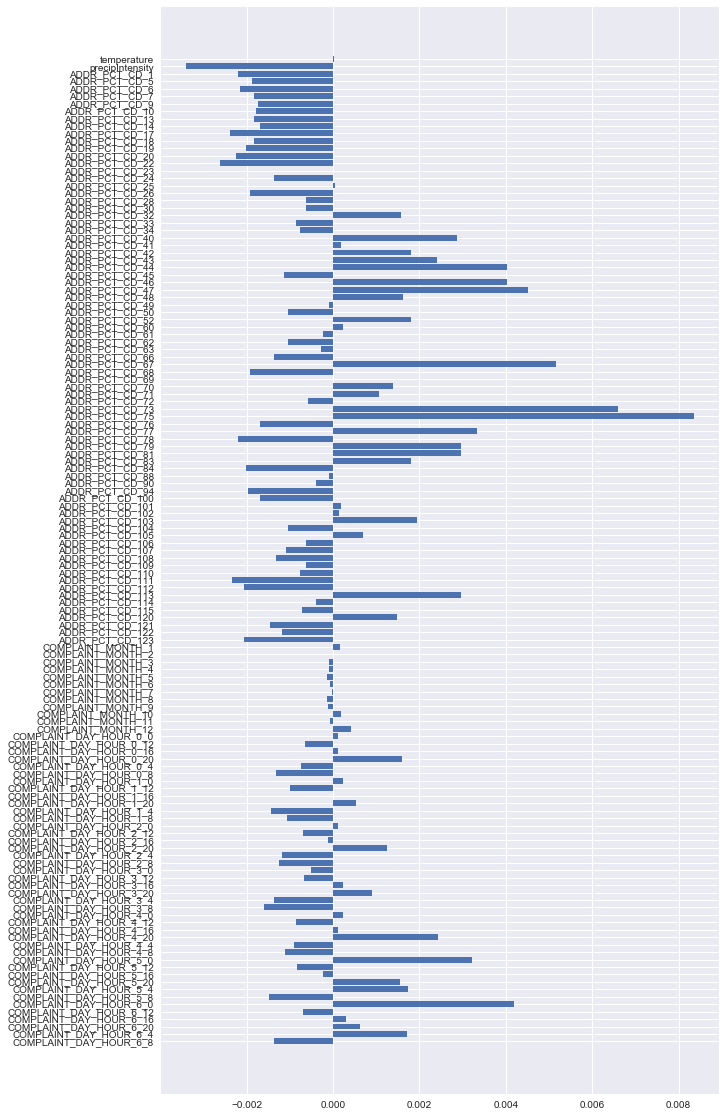

In [47]:
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(np.arange(len(cols)), ridges['Homicide'].coef_)
ax.set_yticks(np.arange(len(cols)))
ax.set_yticklabels(cols)
ax.invert_yaxis()
plt.show()

In [48]:
ridges['Homicide'].coef_

array([  2.47406153e-05,  -3.39710886e-03,  -2.20610998e-03,
        -1.88342524e-03,  -2.16001216e-03,  -1.83732742e-03,
        -1.74513179e-03,  -1.79122960e-03,  -1.83732742e-03,
        -1.69903397e-03,  -2.39050126e-03,  -1.83732742e-03,
        -2.02171870e-03,  -2.25220780e-03,  -2.62099036e-03,
         6.58535846e-06,  -1.37634923e-03,   5.26831780e-05,
        -1.92952306e-03,  -6.38784116e-04,  -6.38784116e-04,
         1.57391122e-03,  -8.69273213e-04,  -7.77077574e-04,
         2.86465017e-03,   1.90976637e-04,   1.80440032e-03,
         2.40367198e-03,   4.01709566e-03,  -1.14586013e-03,
         4.01709566e-03,   4.52417168e-03,   1.62000904e-03,
        -8.56102807e-05,  -1.05366449e-03,   1.80440032e-03,
         2.37074456e-04,  -2.23903739e-04,  -1.05366449e-03,
        -2.70001559e-04,  -1.37634923e-03,   5.16954115e-03,
        -1.92952306e-03,   6.58535846e-06,   1.38951995e-03,
         1.06683521e-03,  -5.92686296e-04,   6.59857356e-03,
         8.35029070e-03,

In [ ]:
X_train_fine.mean()

In [11]:
[x for x in y_train_fine.select_dtypes(exclude=['object']).columns]

['Homicide',
 'Rape',
 'Robbery',
 'FelonyAssault',
 'Burglary',
 'GrandLarceny',
 'GrandLarcenyAuto',
 'Fraud',
 'Forgery',
 'Arson',
 'Drugs',
 'Weapons',
 'CriminalMischief',
 'Other']